# Week 6 Exercises

Karlie Schwartzwald  
DSC530 Summer 2022  
Bellevue University  
Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import numpy as np


import thinkstats2
import thinkplot
import matplotlib
import matplotlib.pyplot as plt
import random

## Exercise 7-1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [4]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [5]:
# The following function selects a random subset of a DataFrame
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

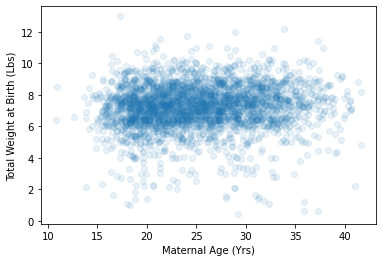

In [6]:
# Scatterplot of 3000 datapoint subset
sample = SampleRows(live,3000)
plt.scatter(sample['agepreg'], sample['totalwgt_lb'], alpha=0.1)
plt.xlabel("Maternal Age (Yrs)")
plt.ylabel("Total Weight at Birth (Lbs)")
plt.show()

In [7]:
import pandas as pd

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [8]:
# Pearson's Correlation
print(f"Pearson's Correlation coefficient is {np.corrcoef(live['agepreg'], live['totalwgt_lb'])[1,0]}.")

Pearson's Correlation coefficient is 0.06883397035410903.


In [9]:
# Spearman's Correlation
print(f"Spearman's Correlation coefficient is {SpearmanCorr(live['agepreg'], live['totalwgt_lb'])}.")

Spearman's Correlation coefficient is 0.09461004109658226.


In [10]:
print(f'These two variables are not correlated, and have little to no effect on one another.')

These two variables are not correlated, and have little to no effect on one another.


## Exercise 8-1

In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [11]:
# Functions needed:

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [12]:
# Solution

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print(f'For iters = {iters}: mean error, xbar', MeanError(means, mu))
    print(f'For iters = {iters}: mean error, median', MeanError(medians, mu))
    
Estimate1()
Estimate1(iters=10000)
Estimate1(iters=100000)

print('Both mean and median appear to have a lower mean error as m increases and thus neither appear to be biased estimators of the population mean.')

For iters = 1000: mean error, xbar -0.007665143447748165
For iters = 1000: mean error, median -0.015801757615800858
For iters = 10000: mean error, xbar 0.006069621371314912
For iters = 10000: mean error, median 0.006938403046472808
For iters = 100000: mean error, xbar -0.0008313935712294978
For iters = 100000: mean error, median 0.0005430849820663816
Both mean and median appear to have a lower mean error as m increases and thus neither appear to be biased estimators of the population mean.


In [13]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print(f'For iters = {iters}: RMSE biased', RMSE(estimates1, sigma**2))
    print(f'For iters = {iters}: RMSE unbiased', RMSE(estimates2, sigma**2))
    
Estimate2()
Estimate2(iters=10000)
Estimate2(iters=100000)
print(f'The biased estimator has consistently lower RMSE than the unbiased estimator does.')

For iters = 1000: RMSE biased 0.5151888078382324
For iters = 1000: RMSE unbiased 0.583589939404642
For iters = 10000: RMSE biased 0.5133201849146997
For iters = 10000: RMSE unbiased 0.5754518890990311
For iters = 100000: RMSE biased 0.5147523654124034
For iters = 100000: RMSE unbiased 0.5767922278410227
The biased estimator has consistently lower RMSE than the unbiased estimator does.


## Exercise 8-2

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

standard error 0.7448319644543796
confidence interval (1.23410745648918, 3.5770242943452564)


0.7448319644543796

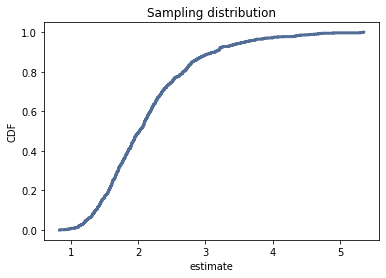

In [14]:
def Estimate3(n=10, iters=1000):
    lam = 2

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        estimates.append(L)
    
    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

    
Estimate3()

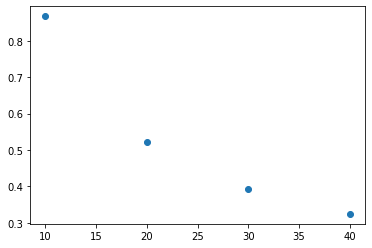

In [15]:
def Estimate4(n=10, iters=1000):
    lam = 2

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        estimates.append(L)
    
    stderr = RMSE(estimates, lam)
    return stderr

stderror10 = Estimate4(n=10)
stderror20 = Estimate4(n=20)
stderror30 = Estimate4(n=30)
stderror40 = Estimate4(n=40)
plt.scatter((10,20,30,40),(stderror10, stderror20, stderror30, stderror40))